In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
dataset = pd.read_csv('D13data1.csv')

In [103]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [104]:
dataset.shape

(17898, 9)

In [105]:
dataset.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [106]:
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [107]:
dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [108]:
dataset.columns = dataset.columns.str.strip()

In [109]:
dataset.rename(columns = {'Mean of the integrated profile':'MIP','Standard deviation of the integrated profile':'SDIP','Excess kurtosis of the integrated profile':'EKIP','Skewness of the integrated profile':'SIP','Mean of the DM-SNR curve':'Mean DM-SNR','Standard deviation of the DM-SNR curve':'SD DM-SNR','Excess kurtosis of the DM-SNR curve':'EK DM-SNR','Skewness of the DM-SNR curve':'Skew DM-SNR','target_class':'target'},inplace=True)

In [110]:
dataset.columns

Index(['MIP', 'SDIP', 'EKIP', 'SIP', 'Mean DM-SNR', 'SD DM-SNR', 'EK DM-SNR',
       'Skew DM-SNR', 'target'],
      dtype='object')

In [111]:
import seaborn as sns   

<Axes: xlabel='target', ylabel='Count'>

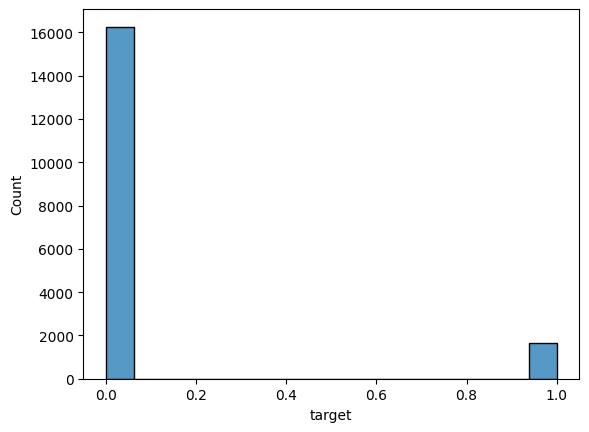

In [112]:
sns.histplot(dataset.target)

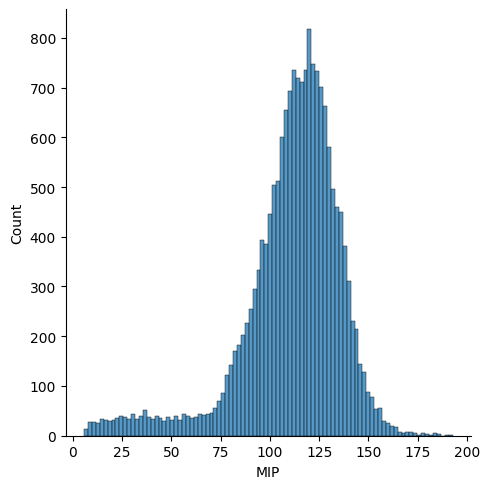

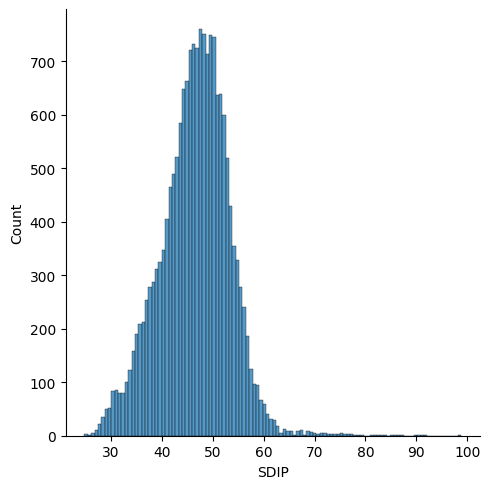

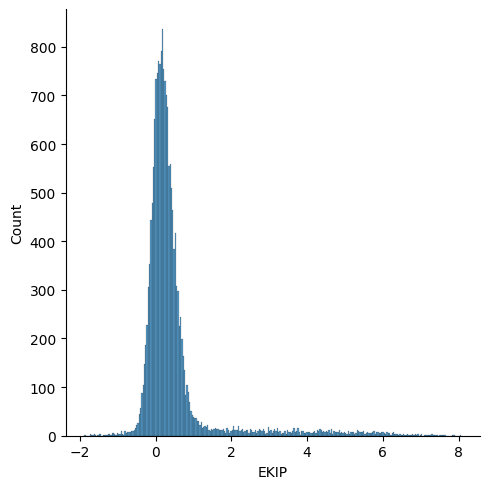

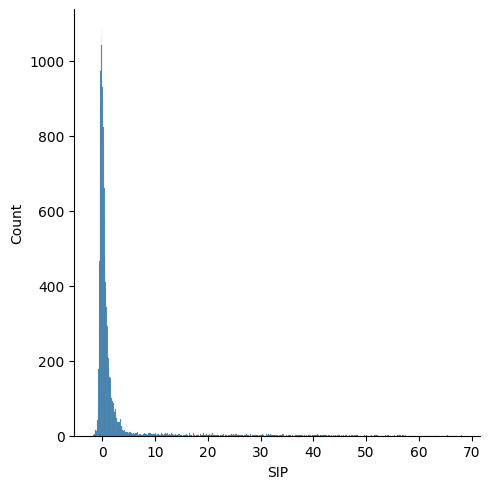

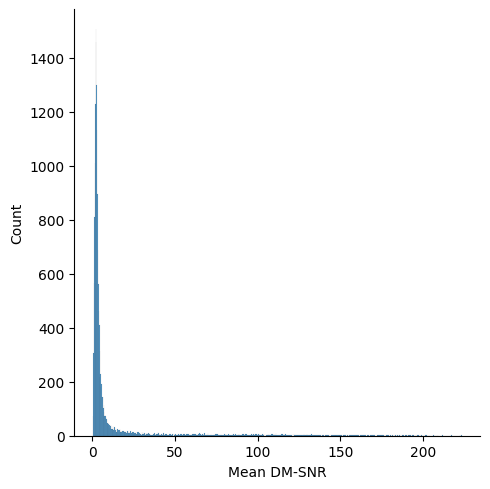

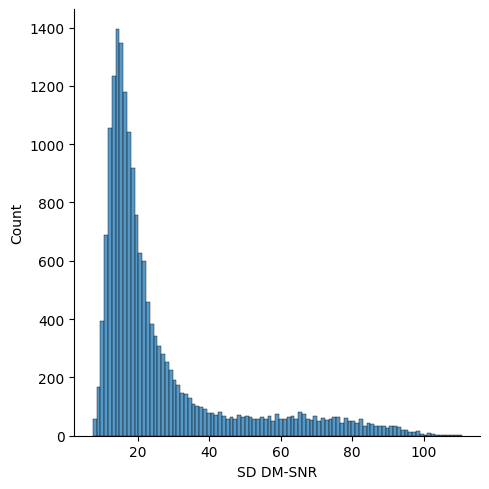

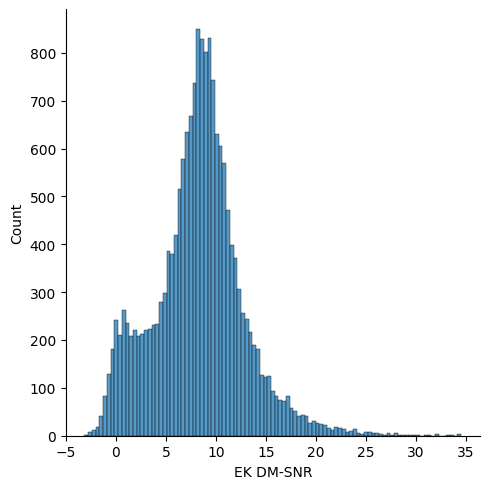

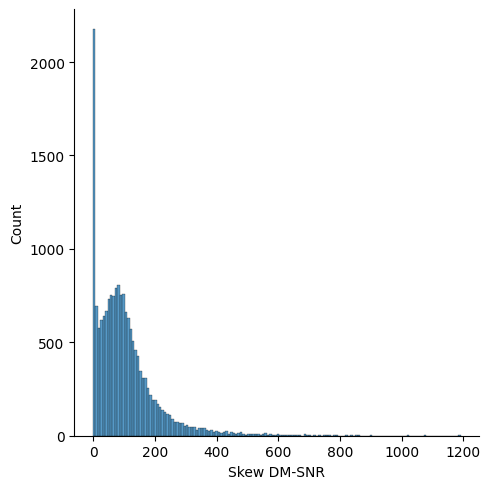

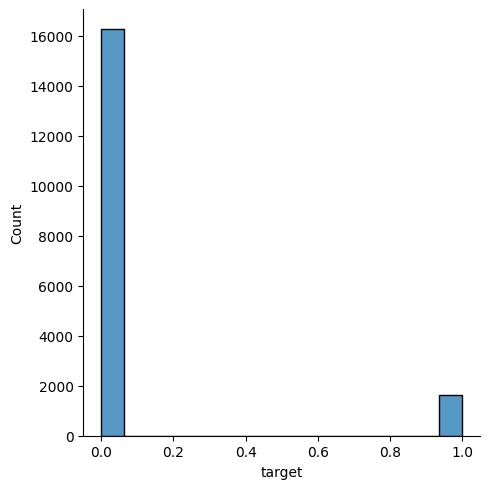

In [113]:
# Distribution plots
for i in dataset.columns:
    sns.displot(x=dataset[i])

<Axes: >

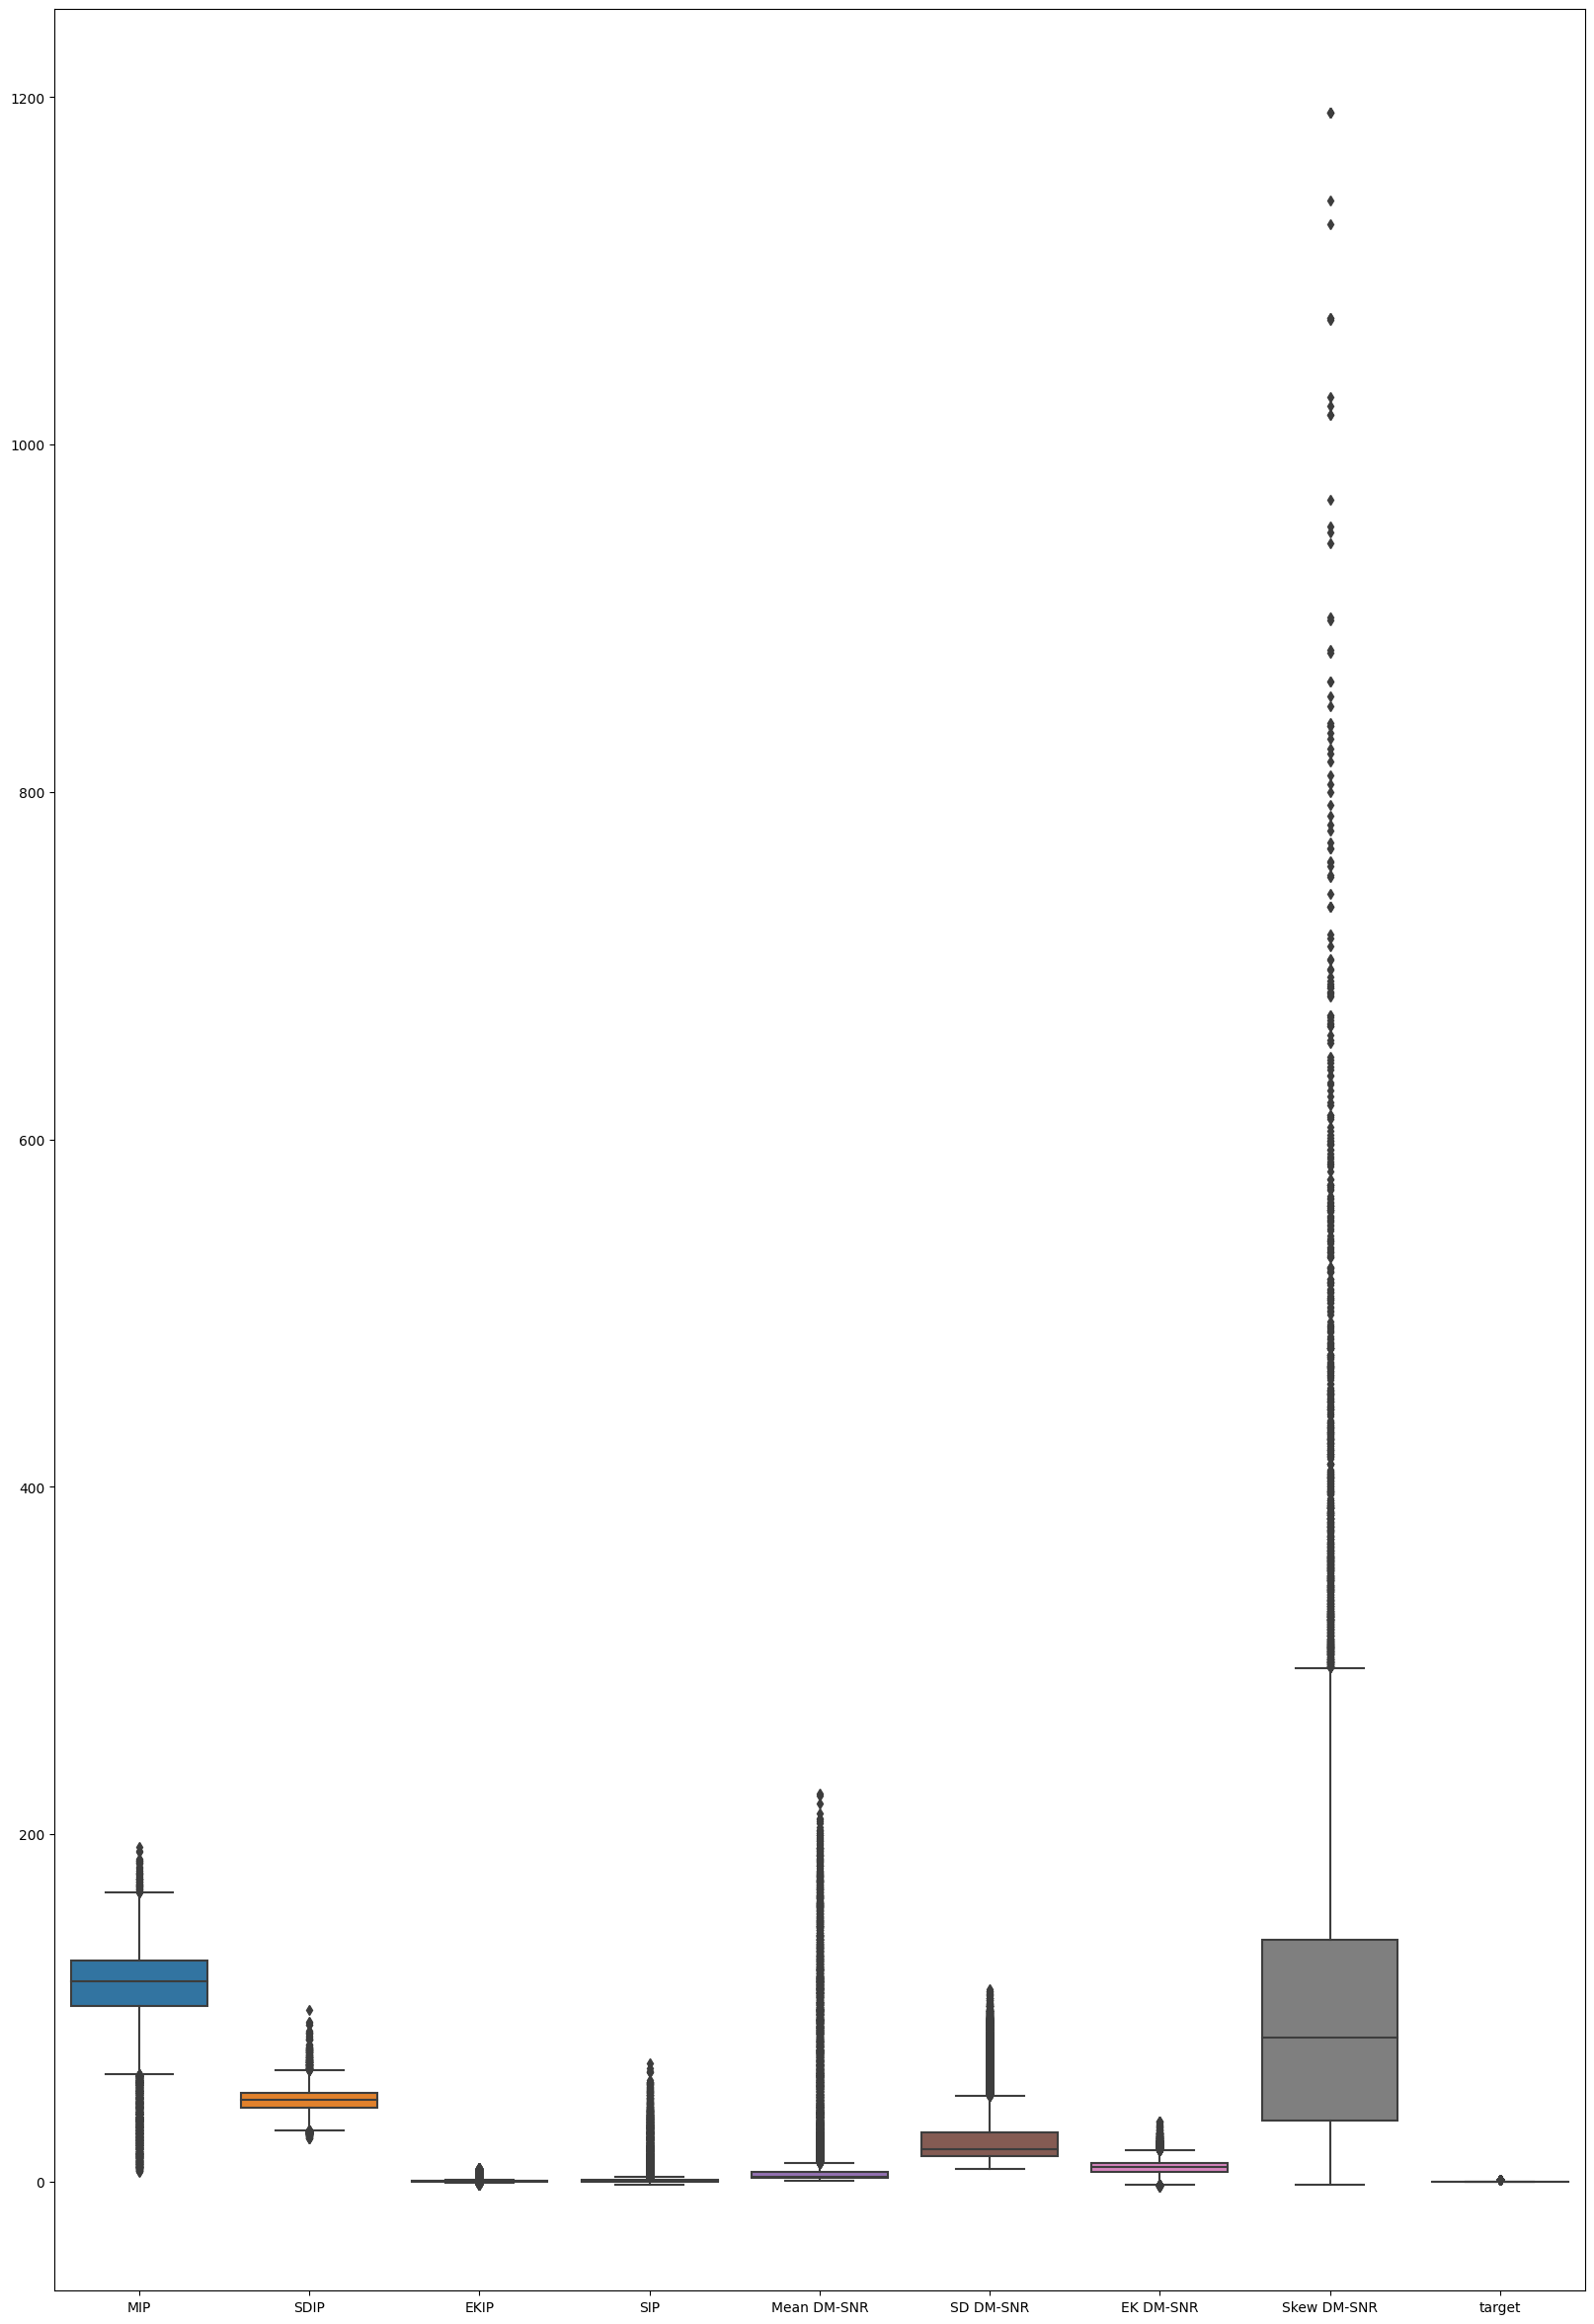

In [114]:
plt.figure(figsize=(20,30))
sns.boxplot(dataset)

<Axes: >

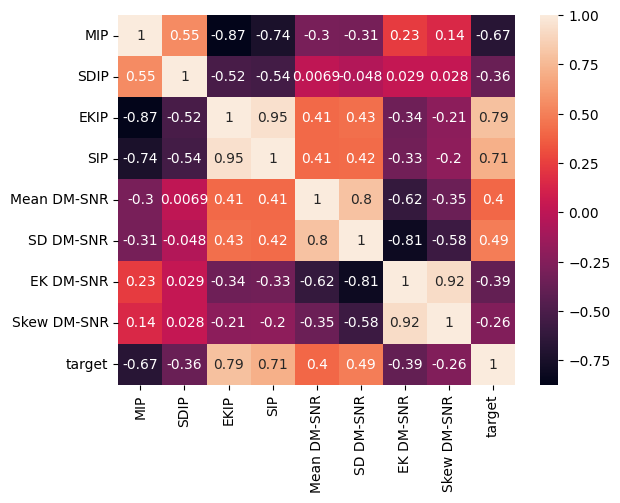

In [115]:
sns.heatmap(dataset.corr(),annot=True)

In [116]:
x = dataset.iloc[:,:-1].values

In [117]:
y = dataset.iloc[:,-1].values

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [119]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [120]:
from sklearn.svm import SVC
modl = SVC(kernel='linear',C=1,random_state=0)
modl.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=0)

In [121]:
y_pred = modl.predict(x_test)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4115
           1       0.93      0.84      0.88       360

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



In [123]:
rbfmod = SVC(kernel='rbf',C=1,random_state=0)
rbfmod.fit(x_train,y_train)

SVC(C=1, random_state=0)

In [124]:
y_pred = rbfmod.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9810055865921787
